In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math as m

from glob import glob

import reduce_dblspec 
import pipeline

from astropy import constants as const
from astropy.table import Table, join


from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.modeling import models, fitting
from astropy.table import Table
from photutils import centroid_com


from astropy import modeling
from astropy import constants as cnst
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

# Local Group data

In [2]:
#Table 3 1st page of local group galaxies, magnitude, mag-errors
Galaxies = ['Canis-Major', 'Sagittarius-dSph', 'Segue', 'Ursa Major-II', 'Bootes-II', 'Segue-II', 'Willman-I', 'Coma Berenices', 'Bootes-III', 'LMC', 'SMC', 'Bootes', 'Draco', 'Ursa-Minor', 'Sculptor', 'Sextans', 'Ursa-Major', 'Carina', 'Hercules', 'Fornax', 'Leo-IV', 'Canes-Venatici-II', 'Leo-V', 'Pisces-II', 'Canes-Venatici', 'Leo-II', 'Leo-I', 'M32', 'Andromeda-IX', 'NGC-205', 'Andromeda-XVII', 'Andromeda-I', 'Andromeda-XXVII', 'Andromeda-III', 'Andromeda-XXV', 'Andromeda-XXVI', 'Andromeda-XI', 'Andromeda-V', 'Andromeda-X', 'Andromeda-XXIII', 'Andromeda-XX', 'Andromeda-XII', 'NGC-147', 'Andromeda-XXI', 'Andromeda-XIV', 'Andromeda-XV', 'Andromeda-XIII', 'Andromeda-II', 'NGC-185', 'Andromeda-XXIX', 'Andromeda-XIX', 'Triangulum', 'Andromeda-XXIV', 'Andromeda-VII', 'Andromeda-XXII', 'IC-10', 'LGS-3', 'Andromeda-VI', 'Andromeda-XVI', 'Andromeda-XXVIII', 'IC-1613', 'Phoenix', 'NGC-6822', 'Cetus', 'Pegasus-dIrr', 'Leo-T', 'WLM', 'Leo-A', 'Andromeda-XVIII', 'Aquarius', 'Tucana', 'Sagittarius-dIrr', 'UGC-4879', 'NGC-3109', 'Sextans-B', 'Antlia', 'Sextans-A', 'KKR-25', 'ESO-410-G-005', 'NGC-55', 'ESO-294-G-010', 'NGC-300', 'IC-5152', 'KKH-98', 'UKS-2323-326', 'KKR-3', 'GR-8', 'UGC-9128', 'UGC-8508', 'IC-3104', 'DDO-125', 'UGCA-86', 'DDO-99', 'IC-4662', 'DDO-190', 'KKH-86', 'NGC-4163', 'DDO-113'] 
M_v = [-14.4, -13.5, -1.5, -4.2, -2.7, -2.5, -2.7, -4.1, -5.8, -18.1, -16.8, -6.3, -8.8, -8.8, -11.1, -9.3, -5.5, -9.1, -6.6, -13.4, -5.8, -4.9, -5.2, -5.0, -8.6, -9.8, -12.0, -16.4, -8.1, -16.5, -8.7, -11.7, -7.9, -10.0, -9.7, -7.1, -6.9, -9.1, -7.6, -10.2, -6.3, -6.4, -14.6, -9.9, -8.4, -9.4, -6.7, -12.4, -14.8, -8.3, -9.2, -18.8, -7.6, -12.6, -6.5, -15.0, -10.1, -11.3, -9.2, -8.5, -15.2, -9.9, -15.2, -11.2, -12.2, -8.0, -14.2, -12.1, -9.7, -10.6, -9.5, -11.5, -12.5, -14.9, -14.5, -10.4, -14.3, -10.5, -11.5, -18.5, -11.2, -18.5, -15.6, -11.8, -13.2, -9.5, -12.2, -12.4, -13.4, -14.0, -14.4, -13.2, -13.2, -15.8, -14.4, -10.0, -14.1, -11.0]
err = [0.8, 0.3, 0.8, 0.6, 0.9, 0.3, 0.8, 0.5, 0.5, 0.1, 0.2, 0.2, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.0, 0.2, 0.3, 0.3, 0.2, 1.1, 0.1, 0.4, 0.1, 0.5, 0.3, 0.5, 0.5, 1.3, 0.2, 1.0, 0.5, 0.0, 1.2, 0.1, 0.6, 0.6, 0.4, 1.3, 0.2, 0.1, 0.4, 0.6, 0.1, 0.5, 0.3, 9.9, 0.2, 0.1, 0.2, 0.4, 0.0, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2, 0.0, 0.1, 0.2, 0.3, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2, 0.3, 0.1, 0.0, 0.3, 0.2, 0.3, 0.2, 0.3, 0.1, 0.0, 0.3, 0.0, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3]
print("mag",len(M_v),"mag errs", len(err), "gal names", len(Galaxies))

#making a table to match with vels table later
table3 = Table([Galaxies, M_v, err],names=('names','M_v','err'))

mag 98 mag errs 98 gal names 98


In [3]:
#Local Group 2nd table - need to calculate velocities (y-axis)

#table 4  for lg velocities
sigma = [20.0, 11.4, 3.9, 6.7, 10.5, 3.4, 4.3, 4.6, 14.0, 20.2, 27.6, 2.4, 9.1, 9.5, 9.2, 7.9, 7.6, 6.6, 3.7, 11.7, 3.3, 4.6, 3.7, 0, 7.6, 6.6, 9.2, 92.0, 4.5, 35.0, 0, 10.6, 0, 4.7, 0, 0, 4.6, 11.5, 3.9, 0, 0, 2.6, 16.0, 0, 5.4, 11.0, 9.7, 7.3, 24.0, 0, 0, 0, 0, 9.7, 0, 0, 7.9, 9.4, 10.0, 0, 0, 0, 0, 17.0, 0, 7.5, 17.5, 9.3, 0, 0, 15.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sigma_err =[3.0, 0.7, 0.8, 1.4, 7.4, 0, 0, 0.8, 3.2, 0.5, 0.5, 0, 1.2, 1.2, 1.4, 1.3, 1.0, 1.2, 0.9, 0.9, 1.7, 1.0, 0, 0, 0.4, 0.7, 1.4, 5.0, 3.6, 5.0, 0, 1.1, 0, 1.8, 0, 0, 0, 1.2, 0, 0, 0, 1.0, 0, 1.3, 0, 0, 0.8, 1.0, 0, 0, 0, 1.6, 0, 0, 0, 0, 0, 0, 0, 0, 2.0, 0, 1.6, 2.0, 1.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
vel = [0, 0, 0, 0, 0, 0, 0, 0, 0, 49.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55.0, 0, 11.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17.0, 0, 0, 0, 0, 0, 15.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.7, 0, 0, 20.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vel_err =[0, 0, 0, 0, 0, 0, 0, 0, 0, 15.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0, 0, 0, 0, 0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.2, 0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
#calculate LG velocities

table4 = Table( [sigma,sigma_err,vel,vel_err],names = ('sigma','sigma_err','vel','vel_err'))
table4['names'] = Galaxies
#print(np.shape(table4),table4[9]['vel'])


#for loop to chose btwn using velocity or applying formula based on sigma values
indices = np.arange(0,len(table4),1)
s_pt5 =[]

for i in indices:
    #print('i',i)
    if table4[i]['vel'] > table4[i]['sigma']:
        s_pt5part = table4[i]['vel']
        print('chose vel for',i,'sigma value problem if =0.0 and sigma value here is:',table4[i]['sigma'])
    else:
        #s_pt5 = np.sqrt()
        coeff = np.sqrt(2) #= 1/np.sqrt(.5)
        v = table4[i]['vel']
        s = table4[i]['sigma']
        s_pt5part = coeff * np.sqrt((.5 * v**2) + s**2)
    s_pt5.append(s_pt5part)
#print('s 1/2',s_pt5)

table4['s 1/2'] = s_pt5

chose vel for 9 sigma value problem if =0.0 and sigma value here is: 20.2
chose vel for 42 sigma value problem if =0.0 and sigma value here is: 16.0
chose vel for 61 sigma value problem if =0.0 and sigma value here is: 0.0
chose vel for 64 sigma value problem if =0.0 and sigma value here is: 0.0


In [5]:
#matching tables to get mags (x-axis) for only LGs that have a vel (y-axis) value

mergedata=(join(table3, table4, keys=['names'])) #merges mag&vel tables for LG, matched by gal names
nozeros_merged = np.where(mergedata['s 1/2'] != 0.0) #removes all non-value data rows
bothtable_nozeros = mergedata[nozeros_merged]
bothtable_nozeros

names,M_v,err,sigma,sigma_err,vel,vel_err,s 1/2
str17,float64,float64,float64,float64,float64,float64,float64
Andromeda-I,-11.7,0.1,10.6,1.1,0.0,0.0,14.990663761154808
Andromeda-II,-12.4,0.2,7.3,1.0,0.0,0.0,10.323759005323595
Andromeda-III,-10.0,0.3,4.7,1.8,0.0,0.0,6.646803743153548
Andromeda-IX,-8.1,1.1,4.5,3.6,0.0,0.0,6.3639610306789285
Andromeda-V,-9.1,0.2,11.5,1.2,0.0,0.0,16.263455967290593
Andromeda-VI,-11.3,0.2,9.4,0.0,0.0,0.0,13.293607486307096
Andromeda-VII,-12.6,0.3,9.7,0.0,0.0,0.0,13.717871555019022
Andromeda-X,-7.6,1.0,3.9,0.0,0.0,0.0,5.515432893255071
Andromeda-XI,-6.9,1.3,4.6,0.0,0.0,0.0,6.505382386916237


# SAGA data

In [6]:
#SAGA mags (x-axis)


#table 2 from saga paper (6) M_r and (7) g-r
saga_names = ['Catch22-1','AnaK-2','Catch22-2','Ody3','AnaK-1', 'Gilgamesh-1']
M_r = [-20.1,-17.1,-17.9,-16.0,-19.0,-18.0]
gr = [0.68,0.41,0.19,0.38,0.41,0.51]
M_v_saga = [] 
#combo = np.array((M_r,gr)) #dont know why wont make it a tuple but no time, jsut force it
combo = [(-20.1,0.68),(-17.1,0.41),(-17.9,0.19),(-16.0,0.38),(-19.0,0.41),(-18.0,0.51)]
print(combo)

#eqt for M_r to M_v from Jester+ 2005
for i,j in combo:
    #M_v_saga = M_r + (0.42)*((gr + 0.22)/1.02) - 0.11
    M_v_saga_eqt = i + (0.42)*((j + 0.22)/1.02) - 0.11
    M_v_saga.append(M_v_saga_eqt)
print('plot these mags for saga',M_v_saga) #replace Sx below with M_v_saga

[(-20.1, 0.68), (-17.1, 0.41), (-17.9, 0.19), (-16.0, 0.38), (-19.0, 0.41), (-18.0, 0.51)]
plot these mags for saga [-19.839411764705883, -16.95058823529412, -17.841176470588234, -15.862941176470589, -18.85058823529412, -17.80941176470588]


In [7]:
(73.33126586 + 74.13208222) / 2

73.73167404

In [8]:
#SAGA velocities
Sy = [183.14,19.5366,57.608,29,53.331, 73.732]# vel km/s
# saving saga data table


saga = Table([saga_names, M_r, gr, M_v_saga, Sy],names=('names','mag-rband','g-r','mag-vband','velocities'))
print(saga)
#myarray = np.arange(0,len(table4_nozeros),1)
#for i in myarray:
#    if table4_nozeros[i] >= 
justnames = [saga['names']]
print(justnames)

   names    mag-rband g-r       mag-vband      velocities
----------- --------- ---- ------------------- ----------
  Catch22-1     -20.1 0.68 -19.839411764705883     183.14
     AnaK-2     -17.1 0.41  -16.95058823529412    19.5366
  Catch22-2     -17.9 0.19 -17.841176470588234     57.608
       Ody3     -16.0 0.38 -15.862941176470589       29.0
     AnaK-1     -19.0 0.41  -18.85058823529412     53.331
Gilgamesh-1     -18.0 0.51  -17.80941176470588     73.732
[<Column name='names' dtype='str11' length=6>
  Catch22-1
     AnaK-2
  Catch22-2
       Ody3
     AnaK-1
Gilgamesh-1]


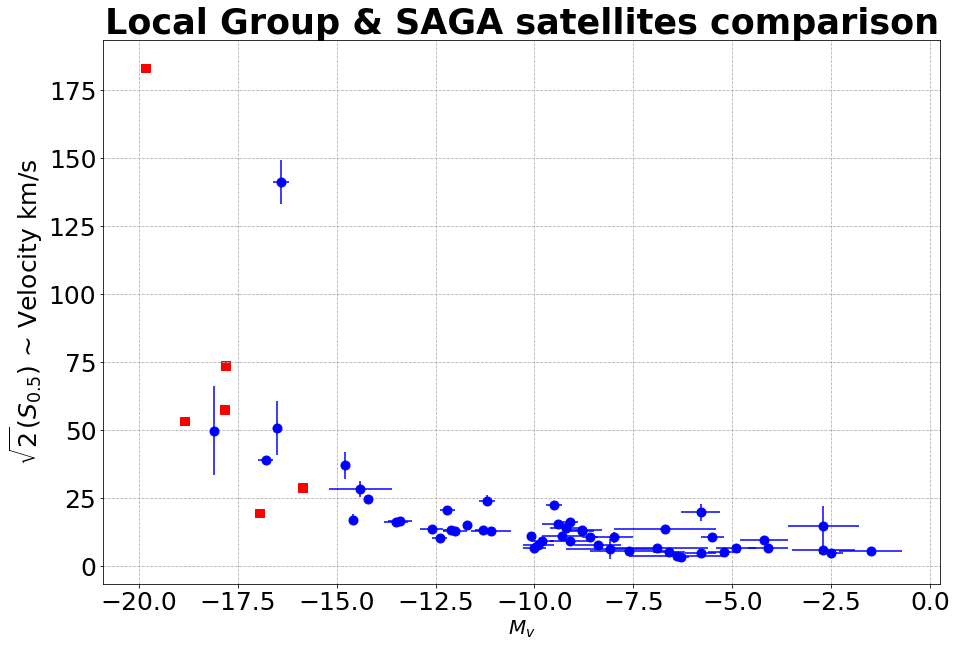

In [9]:
#sanity check

LGx = bothtable_nozeros['M_v']
LGy = bothtable_nozeros['s 1/2']
xebar = bothtable_nozeros['err']
yebar = bothtable_nozeros['sigma_err'] + bothtable_nozeros['vel_err']
#Sx = [-20.1,-17.1,-17.9,-16] #made these up for  saga M_r

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
ax.errorbar(LGx,LGy,xerr=xebar,yerr=yebar,fmt='o',markersize=9,color='b')
ax.scatter(M_v_saga,Sy,marker="s",color='r',s=(75,75),label=justnames)
#S, = ax.plot(LGx,LGy,color = 'b',label='Local Group satellites',marker="o",markersize=15)
#Sa, = ax.plot(M_v_saga,Sy, color='r',label='SAGA satellites', marker="s",markersize=15)
plt.title('Local Group & SAGA satellites comparison',size=35,fontweight='bold')
plt.ylabel(r'$\sqrt{2}(S_{0.5})$ ~ Velocity km/s',fontsize = 25)#(u'$L_{H \u03B1} / L_{ \u03bd ,2800}$',**csfont)
plt.xlabel(r'$M_v$',fontsize=20)#('Total Galaxy Mass ($M_{\odot}$)',**csfont)
#plt.legend(handles=[S, Sa], loc = 'best', fontsize = 35)#'xx-large'
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--')
#plt.savefig('LG_SAGAcomparison.pdf', format='pdf', dpi=1000)

plt.show()


#print('PUT A GRID ON THIS LIKE IMF PLOT B/C IT WILL HELP IT LOOK BUSIER, REDUCE WHITE SPACE')